In [2]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [3]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [4]:
data.index = pd.to_datetime(data.index)

In [5]:
data

,FedFunds,Unemployment,HousingStarts,Inflation
1947-01-01,NaN,NaN,NaN,21.480
1947-02-01,NaN,NaN,NaN,21.620
1947-03-01,NaN,NaN,NaN,22.000
1947-04-01,NaN,NaN,NaN,22.000
1947-05-01,NaN,NaN,NaN,21.950
...,...,...,...,...
2023-08-01,5.33,3.8,1305.0,306.269
2023-09-01,5.33,3.8,1356.0,307.481
2023-10-01,5.33,3.8,1359.0,307.619
2023-11-01,5.33,3.7,1560.0,307.917


In [6]:
data.dropna(inplace = True)

In [7]:
data.head()

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.01
1959-02-01,2.43,5.9,1667.0,29.00
1959-03-01,2.80,5.6,1620.0,28.97
1959-04-01,2.96,5.2,1590.0,28.98
1959-05-01,2.90,5.1,1498.0,29.04


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [9]:
split1 = int(len(data) * .6)
split2 = int(len(data) * .9)
data_in = data[:split1]
data_out = data[split1:split2]
data_hold = data[split2:]

In [10]:
X_in = data_in.iloc[:,1:] 
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [11]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [12]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph fro your model

In [14]:
import matplotlib.pyplot as plt

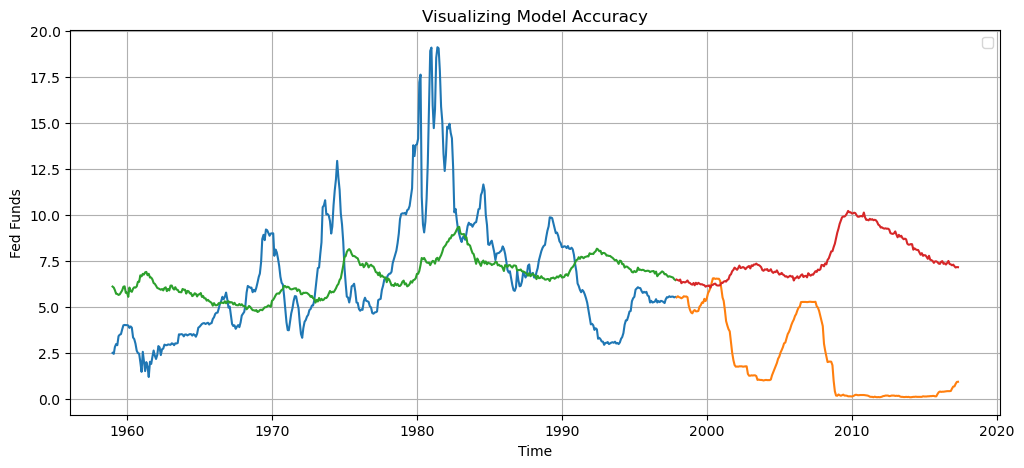

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
in_mse_1 = mean_squared_error(model1.predict(X_in), y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out), y_out)

In [17]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783566852


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
max_degrees = 3

DEGREE: 1


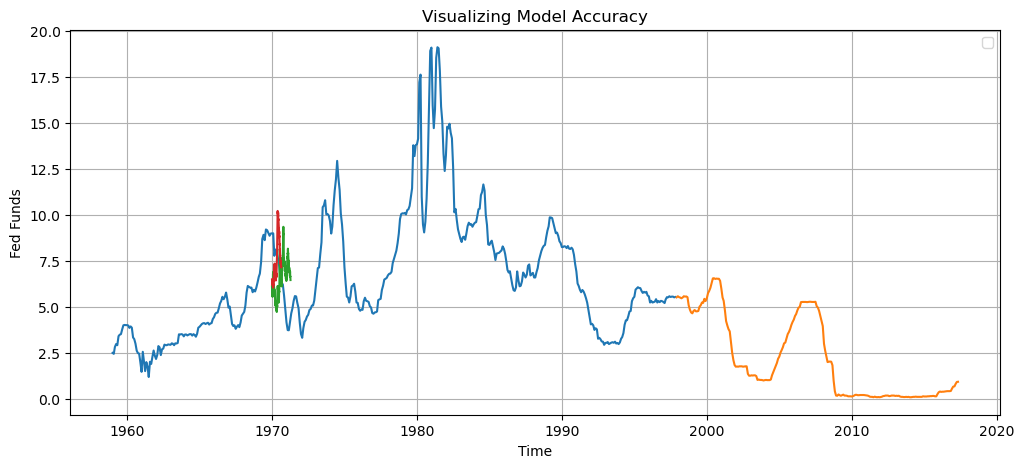

Insample MSE :  10.071422013168643
Outsample MSE :  40.360827835666946
DEGREE: 2


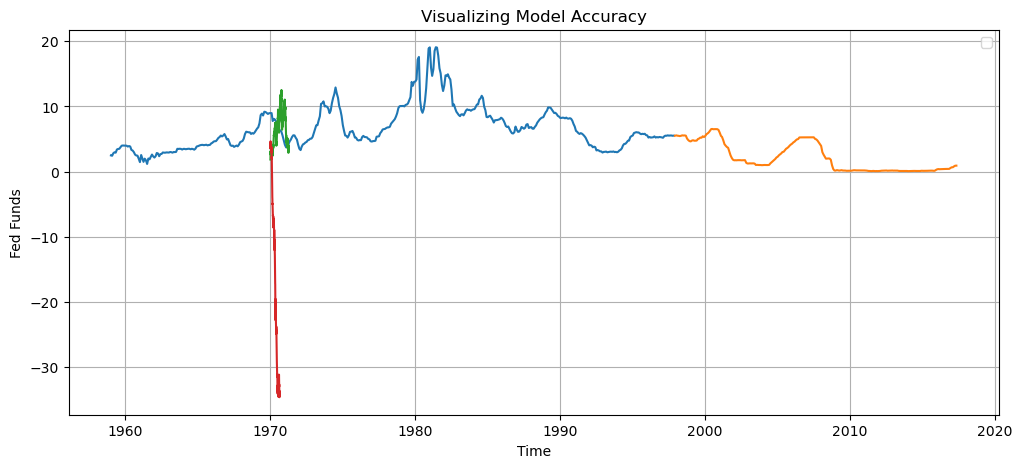

Insample MSE :  3.863477139276067
Outsample MSE :  481.44650990363215
DEGREE: 3


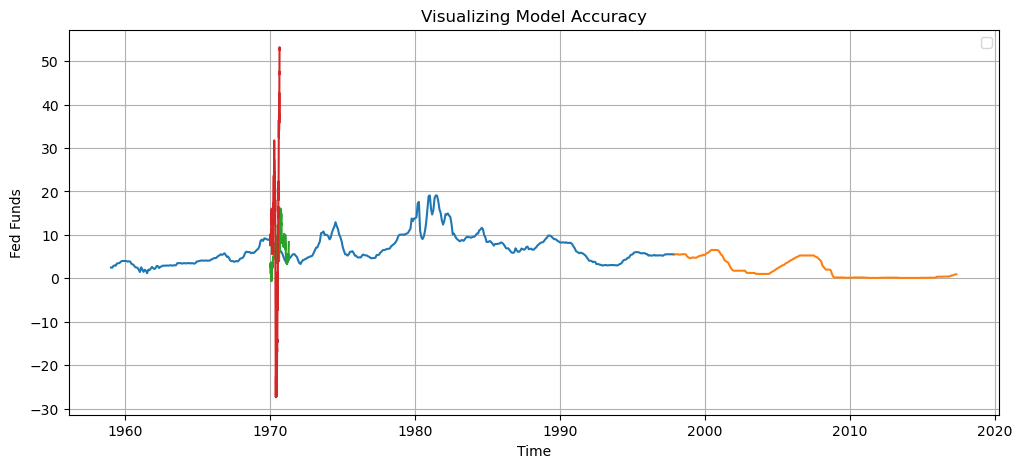

Insample MSE :  1.8723636271946136
Outsample MSE :  371.76618900618945


In [27]:
for degrees in range (1, max_degrees+1):
    print("DEGREE:", degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)
    
    model1 = sm.OLS(y_in, X_in_poly).fit()
    
    plt.figure(figsize = (12,5))
    
    pred_in = model1.predict(X_in_poly)
    pred_in = pd.DataFrame(pred_in, index = y_in.index)    
    
    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(model1.predict(X_in_poly))
    plt.plot(model1.predict(X_out_poly))
    
    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend([])
    plt.grid()
    plt.show()

    in_mse_1 = mean_squared_error(model1.predict(X_in_poly), y_in)
    out_mse_1 = mean_squared_error(model1.predict(X_out_poly), y_out)
    
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)

# 7.) State your observations :

As observed from the graphs and data above, we notice that an increase in the degrees of the model, leads to better in sample MSEs, while the out sample MSEs get worse.